# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [11]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set =dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [13]:
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping the Data

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Part 2 - Building the RNN

### Importing the Keras Libraries

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initializing the RNN

In [16]:
regressor = Sequential()

### Adding the First LSTM Layer some and Dropout Regularisation

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding the Second LSTM Layer some and Dropout Regularisation

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding the Third LSTM Layer some and Dropout Regularisation

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding the Fourth LSTM Layer some and Dropout Regularisation

In [20]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the Output Layer

In [21]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [22]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

### Fitting the RNN into the Training set

In [23]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100

38/38 [==============================] - 16s 108ms/step - loss: 0.0482
Epoch 2/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0038
Epoch 13/10

38/38 [==============================] - 4s 95ms/step - loss: 0.0015
Epoch 98/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0015
Epoch 99/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0014
Epoch 100/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0013


## Part 3 - Making the Predictions and Visuvalising the Results

### Getting the real stock price of google of 2017

In [24]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price =dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of google of 2017

In [25]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 2s 2s/step


### Visuvalising the Results

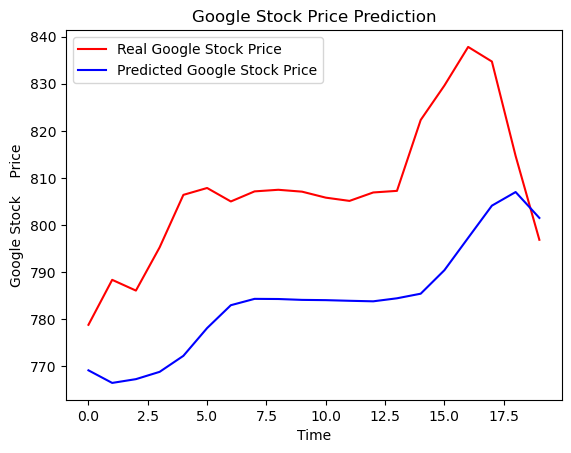

In [26]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock    Price')
plt.legend()
plt.show()